In [1]:
import zipfile
with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
listings_df = pd.read_csv("data/listings.csv")
calendar_df = pd.read_csv("data/calendar.csv")
reviews_df = pd.read_csv("data/reviews.csv")

# **Exploring The Dataset**

# 1. **listings**

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.shape

(3818, 92)

In [6]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
listings_df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


# **2. calendar**

In [11]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [12]:
calendar_df.dropna(inplace=True, ignore_index=True)

In [13]:
calendar_df.drop_duplicates(inplace=True, ignore_index=True)

In [14]:
calendar_df['price'] = calendar_df['price'].str.replace("$", "")
calendar_df['price'] = calendar_df['price'].str.replace(",", "")

In [15]:
calendar_df['available'] = calendar_df['available'].str.replace('[^t]', "False", regex=True)
calendar_df['available'] = calendar_df['available'].str.replace('[t]', "True", regex=True)

In [16]:
calendar_df['price'] = calendar_df['price'].astype(float)
calendar_df['available'] = calendar_df['available'].astype(bool)

In [17]:
calendar_df.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


In [18]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-13,True,85.0
3,241032,2016-01-14,True,85.0
4,241032,2016-01-18,True,85.0
...,...,...,...,...
934537,10208623,2016-01-06,True,87.0
934538,10208623,2016-01-07,True,87.0
934539,10208623,2016-01-10,True,87.0
934540,10208623,2016-01-11,True,87.0


# 3. **reviews_df**

In [19]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [20]:
reviews_df.dropna(inplace=True, ignore_index=True)

In [21]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,8.483100e+04,8.483100e+04,8.483100e+04
mean,3.005270e+06,3.058980e+07,1.701347e+07
std,2.472827e+06,1.636519e+07,1.353705e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725821e+07,5.053141e+06
50%,2.488228e+06,3.228949e+07,1.413622e+07
75%,4.694479e+06,4.457748e+07,2.762404e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### Which area in seattle has the largest number of motels? Which area has the most motels with the highest average review score? Which area has the most expensive motels?

In [22]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

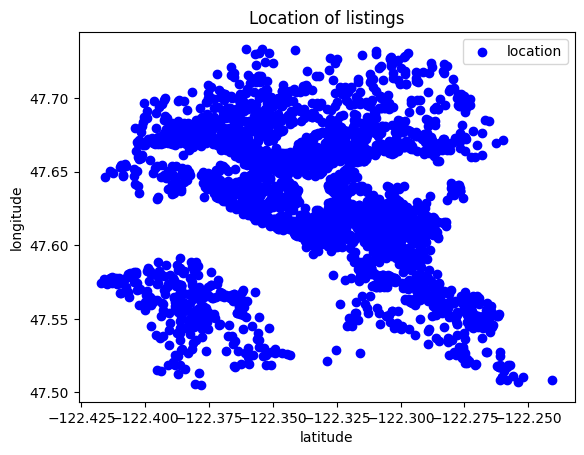

In [23]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["longitude", "latitude"]]
listings_clone.sort_values(["longitude", "latitude"], inplace=True)
plt.scatter(listings_clone.longitude, listings_clone.latitude, color='blue', label='location')
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Location of listings")
plt.legend()
plt.show()

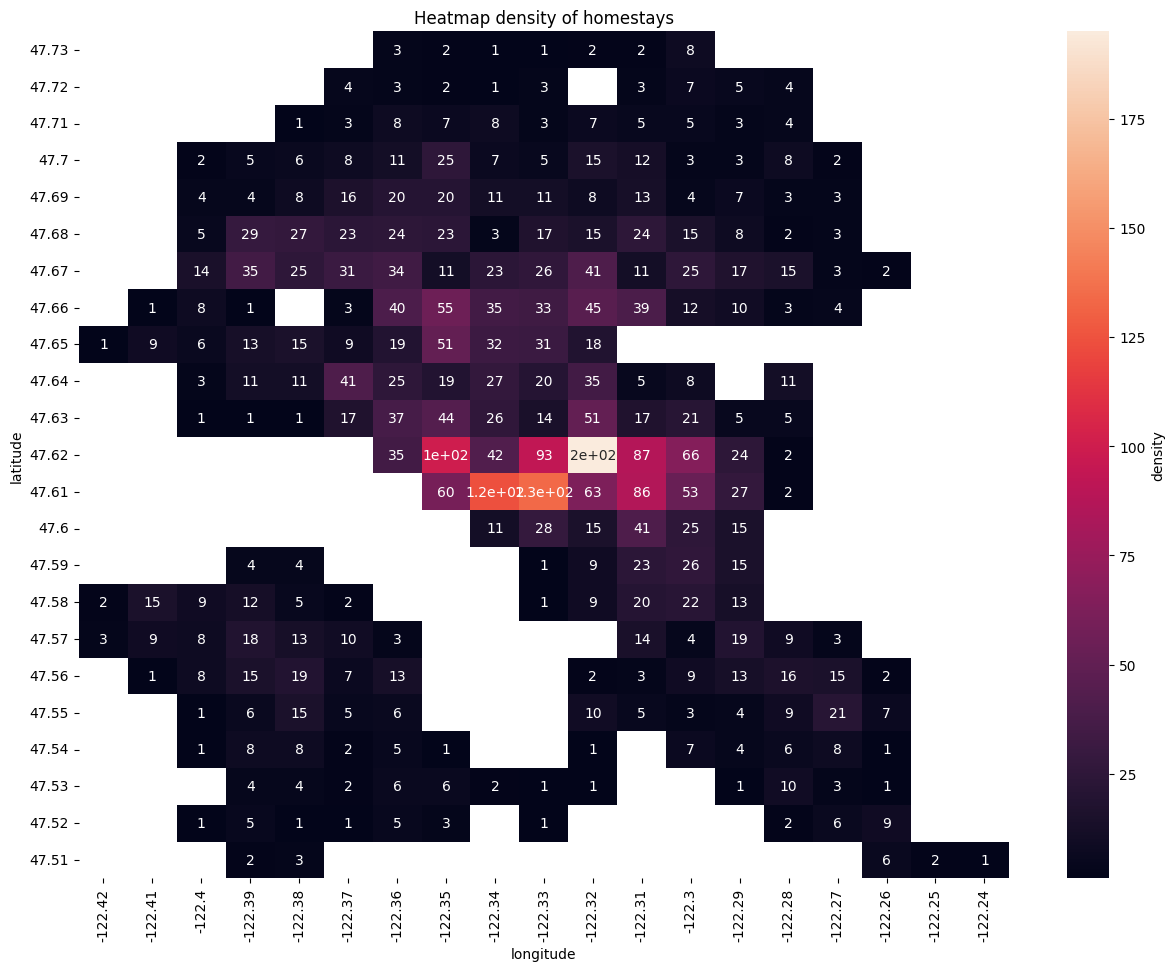

In [24]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["longitude", "latitude"]]
listings_clone = listings_clone.round(2)
listings_clone[["longitude", "latitude"]]
listings_clone["location"] = 1
listings_clone = listings_clone.groupby(["longitude", "latitude"]).sum()
temp = pd.DataFrame(listings_clone.index.to_list(),columns=["longitude", "latitude"])
temp["location"] = listings_clone.location.values
temp.sort_values(by="latitude", inplace=True)
plt.figure(figsize=(15, 11)) 
plt.title("Heatmap density of homestays")
listings_heatmap = temp.pivot(index="latitude", columns="longitude", values="location")
listings_heatmap.sort_index(ascending=False, inplace=True)
heatmap = sns.heatmap(listings_heatmap,  annot=True)
# Customize the color bar (legend)
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('density')  # Set the label for the color bar
colorbar.ax.tick_params(labelsize=10)  # Set the size of the color bar ticks

plt.show()

Homestays are distributed throughout the city, with the largest concentration in the city center.

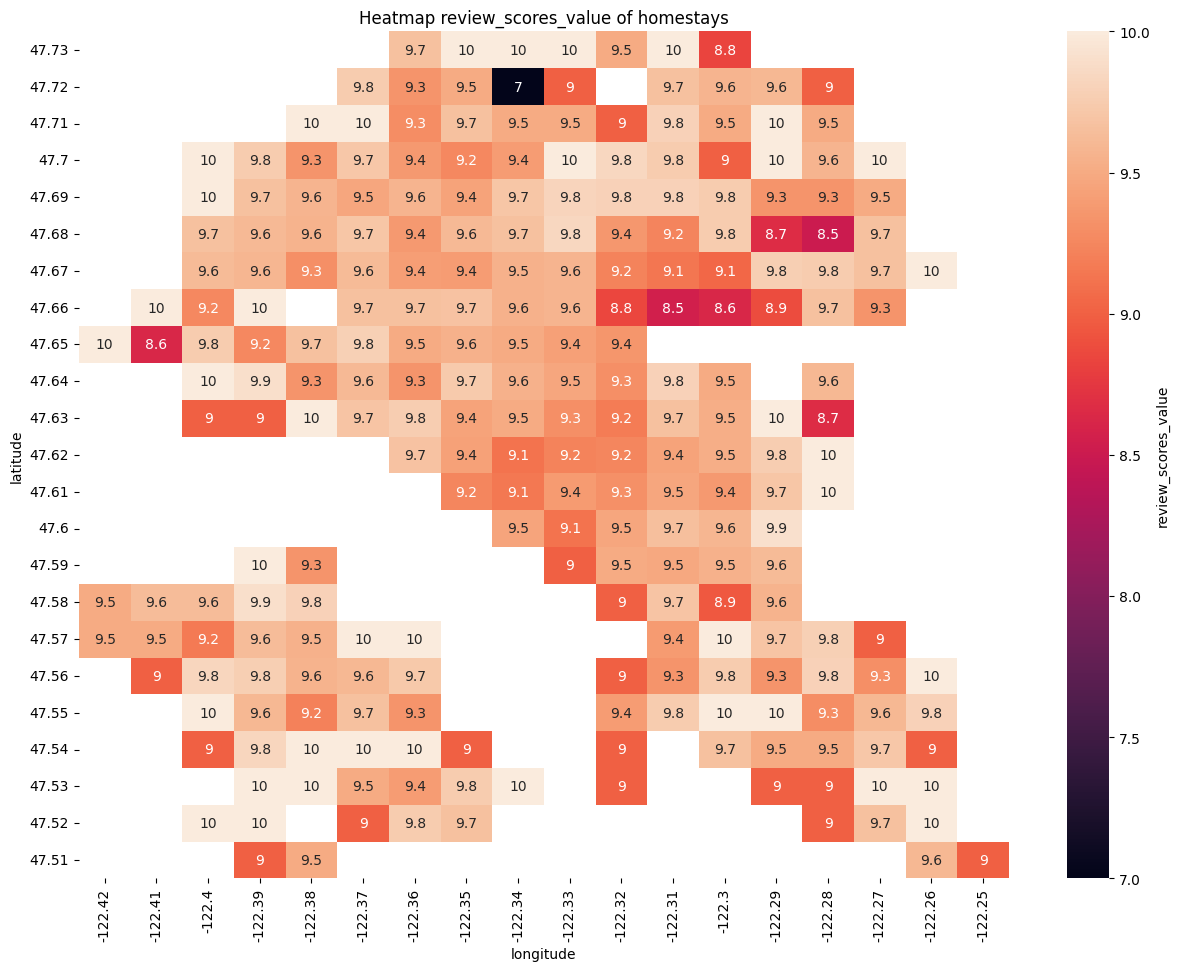

In [25]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["longitude", "latitude", "review_scores_value"]]
listings_clone.dropna(inplace=True)
listings_clone = listings_clone.round(2)
listings_clone = listings_clone.groupby(["longitude", "latitude"]).mean()

temp = pd.DataFrame(listings_clone.index.to_list(),columns=["longitude", "latitude"])
temp["review_scores_value"] = listings_clone.review_scores_value.values
temp.sort_values(by="latitude", inplace=True)
plt.figure(figsize=(15, 11)) 
plt.title("Heatmap review_scores_value of homestays")
listings_heatmap = temp.pivot(index="latitude", columns="longitude", values="review_scores_value")
listings_heatmap.sort_index(ascending=False, inplace=True)
heatmap = sns.heatmap(listings_heatmap,  annot=True)
# Customize the color bar (legend)
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('review_scores_value')  # Set the label for the color bar
colorbar.ax.tick_params(labelsize=10)  # Set the size of the color bar ticks

What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [26]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-13,True,85.0
3,241032,2016-01-14,True,85.0
4,241032,2016-01-18,True,85.0
...,...,...,...,...
934537,10208623,2016-01-06,True,87.0
934538,10208623,2016-01-07,True,87.0
934539,10208623,2016-01-10,True,87.0
934540,10208623,2016-01-11,True,87.0


In [27]:
calendar_df["month,year"] = calendar_df["date"].str[:7]
calendar_df["month,year"]

0         2016-01
1         2016-01
2         2016-01
3         2016-01
4         2016-01
           ...   
934537    2016-01
934538    2016-01
934539    2016-01
934540    2016-01
934541    2016-01
Name: month,year, Length: 934542, dtype: object

In [28]:
temp = calendar_df[["listing_id","month,year","available"]].groupby(["listing_id", "month,year"]).count()
calendar_df_month_year = pd.DataFrame(temp.index.to_list(),columns=["listing_id","month,year"])
calendar_df_month_year["available"] = temp.available.values
calendar_df_month_year

,listing_id,"month,year",available
0,3335,2016-02,1
1,3335,2016-03,31
2,3335,2016-04,30
3,3335,2016-05,31
4,3335,2016-06,30
...,...,...,...
36110,10340165,2016-09,30
36111,10340165,2016-10,31
36112,10340165,2016-11,30
36113,10340165,2016-12,31


In [29]:
calendar_df_month_year_max_available = calendar_df_month_year.groupby("month,year").sum()
calendar_df_month_year_max_available

,listing_id,available
"month,year",,
2016-01,15768742291,59239
2016-02,15754637025,73321
2016-03,15904315160,83938
2016-04,16079598852,76037
2016-05,14149731804,79971
2016-06,14079239744,77244
2016-07,13043704245,74222
2016-08,13465458689,76347
2016-09,14074491909,77246


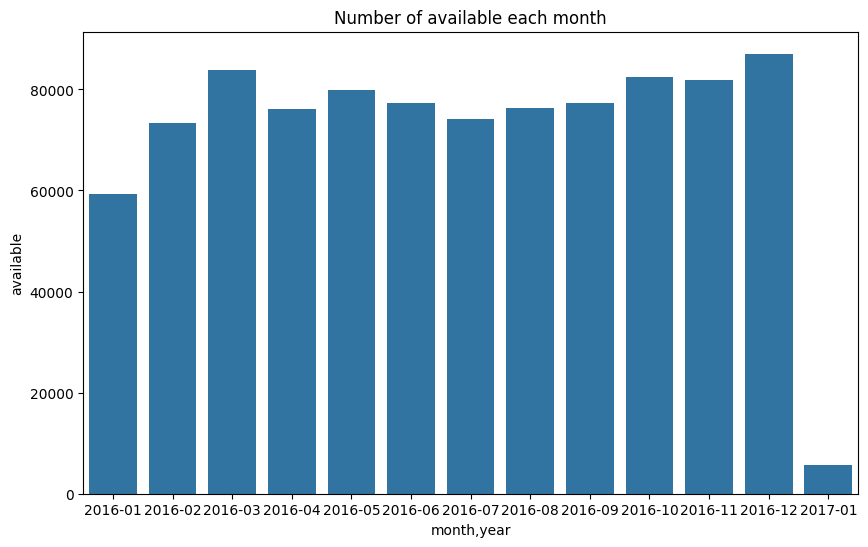

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month,year', y='available', data=calendar_df_month_year_max_available)
plt.title('Number of available each month')
plt.xlabel('month,year')
plt.ylabel('available')
plt.show()

In [31]:
calendar_df_month_year_max_available_each_id = calendar_df_month_year[calendar_df_month_year["month,year"]=="2016-01"].groupby("listing_id").sum()
calendar_df_month_year_max_available_each_id

,"month,year",available
listing_id,,
4291,2016-01,28
5682,2016-01,10
6606,2016-01,28
7369,2016-01,3
9419,2016-01,28
...,...,...
10331249,2016-01,17
10332096,2016-01,28
10334184,2016-01,24


In [32]:
# Top 10 homestays with the largest number of guests in 01/2016
calendar_df_month_year_max_available_each_id.sort_values("available").head(20)

,"month,year",available
listing_id,,
10210625,2016-01,1
8257837,2016-01,1
8301680,2016-01,1
1851863,2016-01,1
3968416,2016-01,1
8741711,2016-01,1
1872885,2016-01,1
1833250,2016-01,1
202260,2016-01,1


In [33]:
temp = calendar_df[["listing_id","month,year","price"]].groupby(["listing_id", "month,year"]).mean()
calendar_df_price_month_year = pd.DataFrame(temp.index.to_list(),columns=["listing_id","month,year"])
calendar_df_price_month_year["price"] = temp.price.values
calendar_df_price_month_year

,listing_id,"month,year",price
0,3335,2016-02,120.0
1,3335,2016-03,120.0
2,3335,2016-04,120.0
3,3335,2016-05,120.0
4,3335,2016-06,120.0
...,...,...,...
36110,10340165,2016-09,43.0
36111,10340165,2016-10,43.0
36112,10340165,2016-11,43.0
36113,10340165,2016-12,43.0


In [34]:
calendar_df_price_mean_each_month_year = calendar_df_price_month_year[["month,year","price"]].groupby(["month,year"]).mean()
calendar_df_price_mean_each_month_year

,price
"month,year",
2016-01,118.925929
2016-02,123.809194
2016-03,128.477274
2016-04,133.058710
2016-05,140.706452
2016-06,149.974092
2016-07,154.369813
2016-08,151.910558
2016-09,143.995804


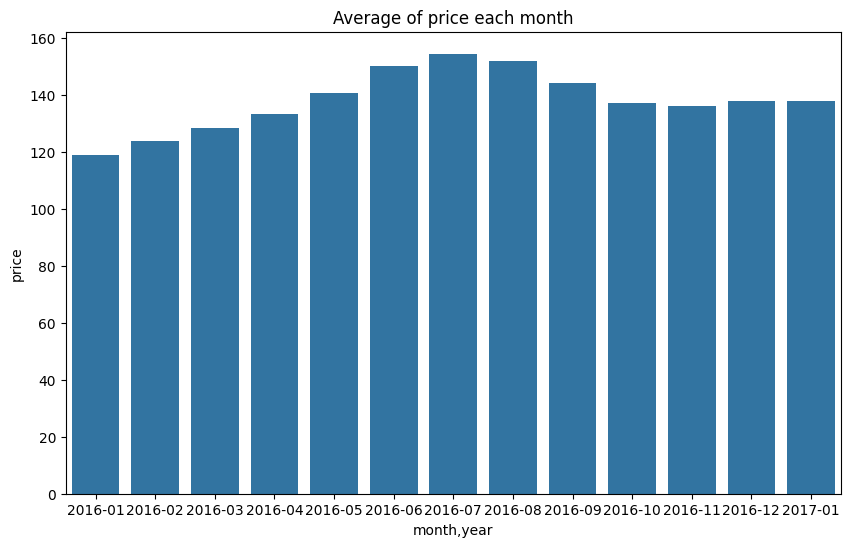

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month,year', y='price', data=calendar_df_price_mean_each_month_year)
plt.title('Average of price each month')
plt.xlabel('month,year')
plt.ylabel('price')
plt.show()

The busiest time of year is at the beginning of the year. During this time, prices drop the most.

In [36]:
listings_df_amenities = listings_df[["id", "amenities"]]
listings_df_amenities

,id,amenities
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...
3813,8101950,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,8902327,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,10267360,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,9604740,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


In [37]:
for key, row in listings_df_amenities.iterrows():
    amenities = row["amenities"]
    amenities = amenities[1:len(amenities)-1]
    for amenite in amenities.split(","):
        amenite_temp = str.replace(amenite,"\"", "")
        if amenite_temp not in listings_df_amenities.columns:
            listings_df_amenities[amenite_temp] = 0
        listings_df_amenities.loc[listings_df_amenities[listings_df_amenities.id == row["id"]].index, amenite_temp] = 1

listings_df_amenities

,id,amenities,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3814,8902327,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3815,10267360,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3816,9604740,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
listings_df_amenities_total = listings_df_amenities[listings_df_amenities.columns[2:]].sum(axis=0)
listings_df_amenities_total

TV                            2574
Cable TV                      1446
Internet                      2811
Wireless Internet             3667
Air Conditioning               677
Kitchen                       3423
Heating                       3627
Family/Kid Friendly           1963
Washer                        2992
Dryer                         2997
Free Parking on Premises      2167
Buzzer/Wireless Intercom       538
Smoke Detector                3281
Carbon Monoxide Detector      2485
First Aid Kit                 1680
Safety Card                    727
Fire Extinguisher             2196
Essentials                    3237
Pets Allowed                   472
Pets live on this property     883
Dog(s)                         509
Cat(s)                         382
Hot Tub                        303
Indoor Fireplace               886
Shampoo                       2670
Breakfast                      291
24-Hour Check-in               616
Hangers                        846
Hair Dryer          

In [39]:
listings_df_amenities_total.sort_values(ascending=False).head(10)

Wireless Internet    3667
Heating              3627
Kitchen              3423
Smoke Detector       3281
Essentials           3237
Dryer                2997
Washer               2992
Internet             2811
Shampoo              2670
TV                   2574
dtype: int64

<BarContainer object of 10 artists>

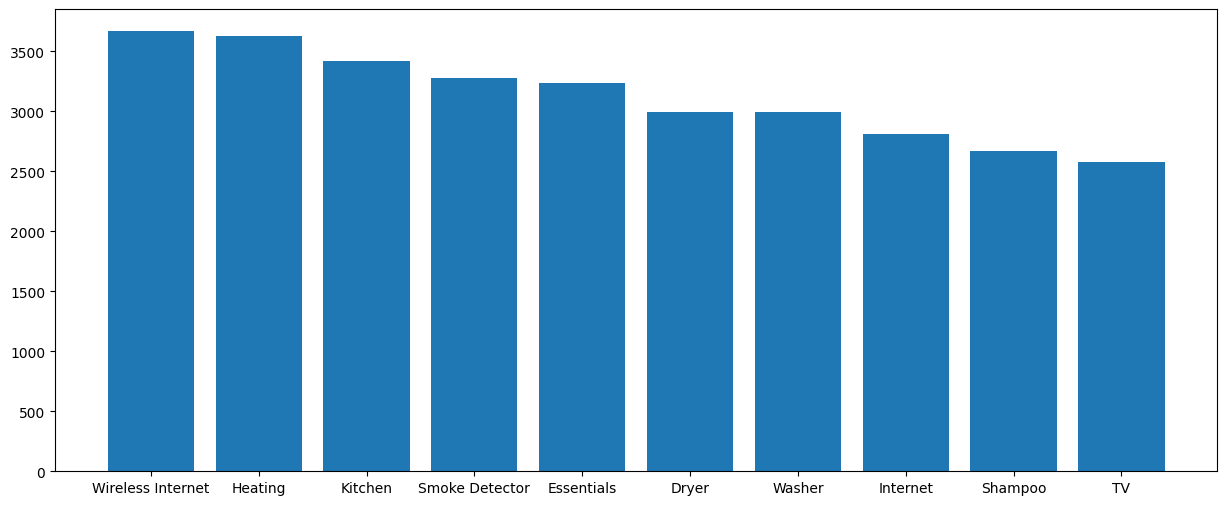

In [40]:
plt.figure(figsize=(15, 6))
plt.bar(listings_df_amenities_total.sort_values(ascending=False).head(10).index, listings_df_amenities_total.sort_values(ascending=False).head(10).values)

In [46]:
listings_clone = listings_df.copy()
listings_clone = listings_clone[["id", "review_scores_value"]]
listings_clone = listings_clone.dropna()
listings_clone.review_scores_value = listings_clone.review_scores_value.astype(float)
mean = listings_clone.review_scores_value.mean()
mean

np.float64(9.452245414294751)

In [57]:
listings_good_than_mean = listings_clone[listings_clone.review_scores_value >= mean]
listings_good_than_mean

,id,review_scores_value
0,241032,10.0
1,953595,10.0
2,3308979,10.0
5,5956968,10.0
6,1909058,10.0
...,...,...
3805,8054902,10.0
3806,5458027,10.0
3811,8578490,10.0
3812,3383329,10.0


In [58]:
listings_df_amenities_total_good_than_mean = listings_df_amenities[listings_df_amenities.id.isin(listings_good_than_mean.id)][listings_df_amenities.columns[2:]].sum(axis=0)
listings_df_amenities_total_good_than_mean.sort_values(ascending=False).head(10)

Wireless Internet           1732
Heating                     1708
Smoke Detector              1589
Kitchen                     1588
Essentials                  1552
Dryer                       1380
Washer                      1371
Shampoo                     1325
Internet                    1314
Carbon Monoxide Detector    1241
dtype: int64

<BarContainer object of 10 artists>

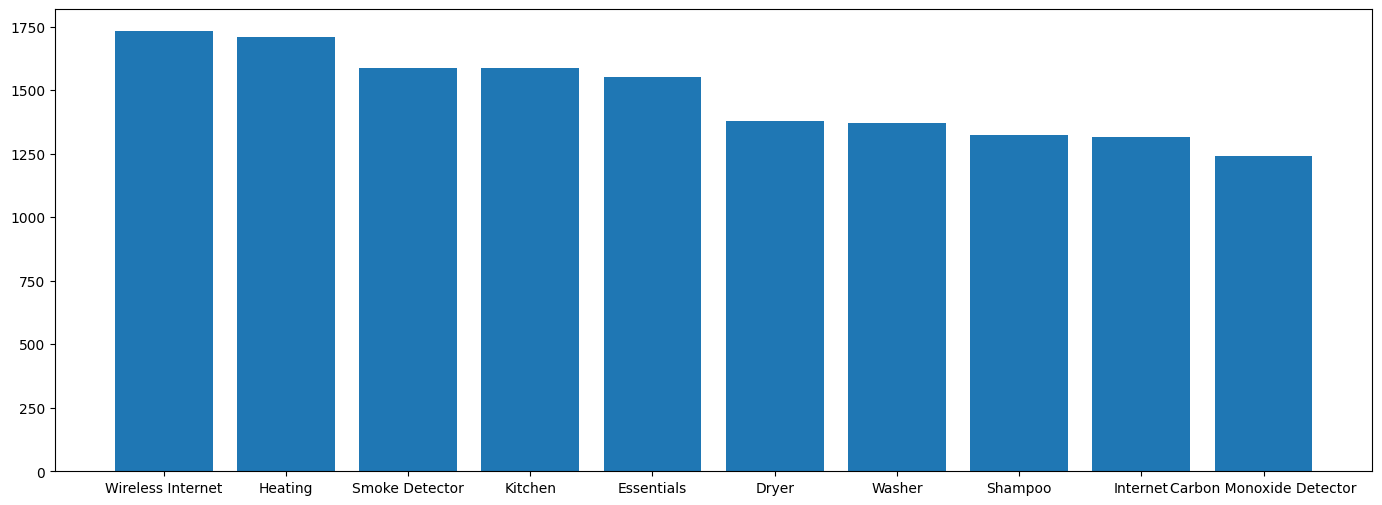

In [59]:
plt.figure(figsize=(17, 6))
plt.bar(listings_df_amenities_total_good_than_mean.sort_values(ascending=False).head(10).index, listings_df_amenities_total_good_than_mean.sort_values(ascending=False).head(10).values)

In [60]:
listings_bad_than_mean = listings_clone[listings_clone.review_scores_value < mean]
listings_bad_than_mean

,id,review_scores_value
4,278830,9.0
9,2493658,9.0
11,4454295,9.0
15,8988178,8.0
16,3245876,9.0
...,...,...
3807,4940491,9.0
3808,1844791,9.0
3809,6120046,8.0
3810,262764,8.0


<BarContainer object of 10 artists>

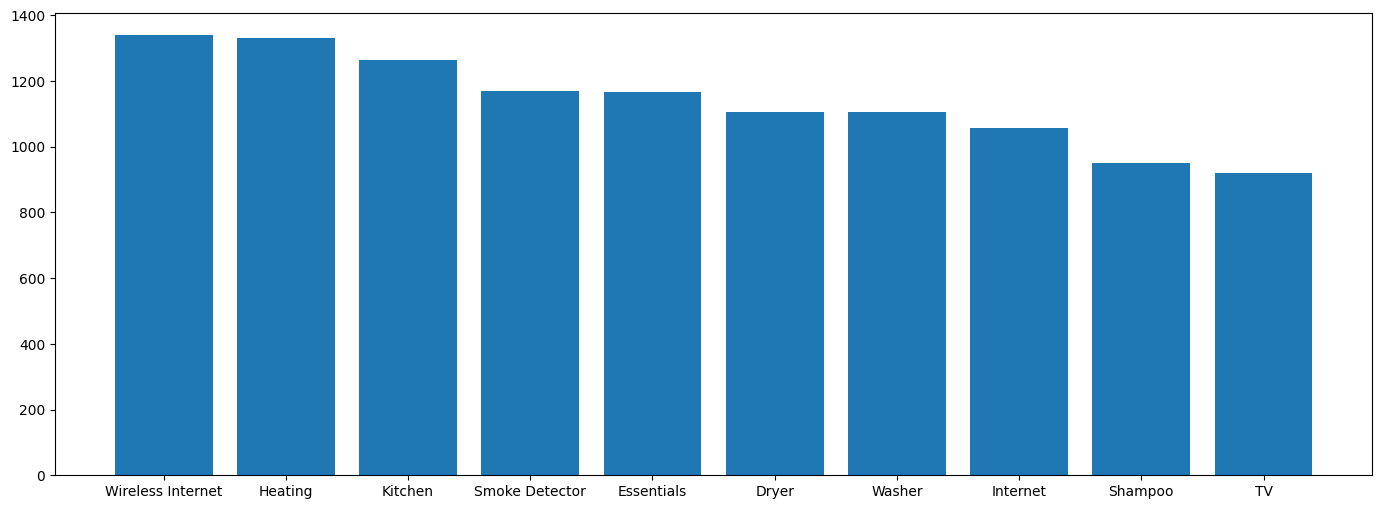

In [62]:
listings_df_amenities_total_bad_than_mean = listings_df_amenities[listings_df_amenities.id.isin(listings_bad_than_mean.id)][listings_df_amenities.columns[2:]].sum(axis=0)
plt.figure(figsize=(17, 6))
plt.bar(listings_df_amenities_total_bad_than_mean.sort_values(ascending=False).head(10).index, listings_df_amenities_total_bad_than_mean.sort_values(ascending=False).head(10).values)

not too different, just in CO2 detect and tv